In [3]:
import pickle
import gzip
import os
import pandas as pd
os.environ['KMP_DUPLICATE_LIB_OK']='True'

with gzip.open('testPickleFile.pickle','rb') as f:
    data = pickle.load(f)

In [4]:
def none_to_zero(list):
    new_list = []
    for i in list:
        if i == None:
            i = 0
        new_list.append(i)

    return new_list

def find_reward_index(list):
    len_list = []
    for i in data['info']:
        if i != 0:
            len_list.append(data['info'].index(i))
    return len_list, len(len_list)

In [5]:
data['info'] = none_to_zero(data['info'])
len_list = sorted(list(set(find_reward_index(data['info'])[0])))
len_list_len = len(len_list)
print(len_list)
print(len_list_len)

[821, 1673, 2583, 3587, 4636, 5577, 6204, 7190, 7940, 9830, 10759, 11709, 12637, 13707, 14601, 15547, 16557, 17471, 19395, 20408, 21467, 22375, 26078, 26947, 27780, 28617, 29378, 30359, 31206, 32145, 32783, 33685, 34625, 36592, 37478, 38263, 39295, 41143, 42818, 43732, 44492, 45413, 46431, 47231, 47879, 48617, 49422, 50369, 50717, 51543, 52425, 53228, 54211, 55231, 56139, 56840, 57777, 58677, 59439, 60338, 61306, 62089, 63190, 64218, 64913, 65694, 68553, 69576, 70658, 71503, 73223, 74028, 77023, 78957, 84065, 85144, 86098, 87182, 88148, 89063, 90070, 92087, 92962, 93846, 94544, 95613, 98250]
87


In [6]:
hierarchy5_list = []
hierarchy4_list = []
hierarchy3_list = []
length_list = []

for i in range(1, len_list_len):
    hierarchy5_list.append(data['hierarchy5'][len_list[i-1]:len_list[i]+1])
    hierarchy4_list.append(data['hierarchy4'][len_list[i-1]:len_list[i]+1])
    hierarchy3_list.append(data['hierarchy3'][len_list[i-1]:len_list[i]+1])
    length_list.append(len_list[i] - len_list[i-1])

In [7]:
df5 = pd.DataFrame(hierarchy5_list)#.fillna(0)
df5.columns = df5.columns.astype(str)

df4 = pd.DataFrame(hierarchy4_list)#.fillna(0)
df4.columns = df4.columns.astype(str)

df3 = pd.DataFrame(hierarchy3_list)#.fillna(0)
df3.columns = df3.columns.astype(str)

In [6]:
print(df5.shape,df4.shape, df3.shape)
print(sum(df5.isnull().sum()), sum(df4.isnull().sum()), sum(df3.isnull().sum()))
print(max(length_list))

(86, 5109) (86, 5109) (86, 5109)
341859 341859 341859
5108


In [7]:
mean_df5 = df5.mean()
mean_df4 = df4.mean()
mean_df3 = df3.mean()

In [8]:
mean_df5

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5104    1.0
5105    1.0
5106    1.0
5107    1.0
5108    1.0
Length: 5109, dtype: float64

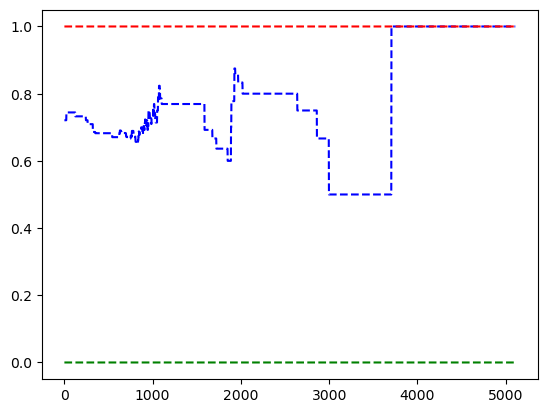

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x3 = list(range(0, max(length_list)+1))
x2 = list(range(0, max(length_list)+1))
x1 = list(range(0, max(length_list)+1))
y3 = mean_df5
y2 = mean_df4
y1 = mean_df3
plt.plot(x1, y1, 'b--', x2, y2, 'g--', x3, y3, 'r--')
plt.show()